In [25]:
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageEnhance
import numpy as np
import os

def plot_image(image, title="Image"):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.array(image), cmap="gray" if image.mode == "L" else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

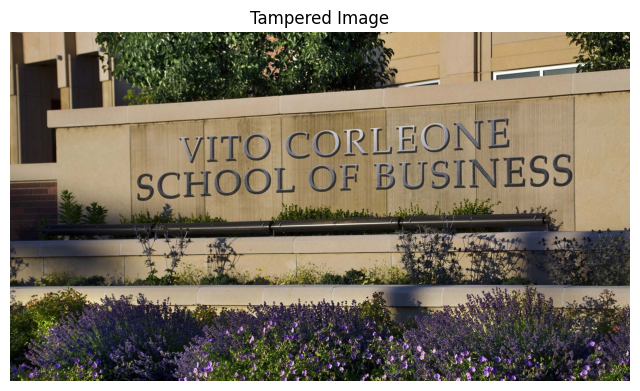

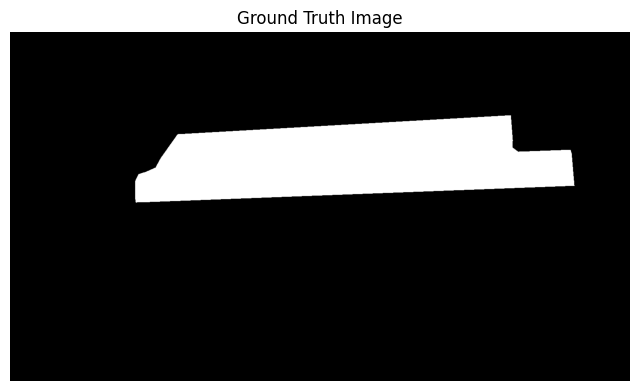

In [26]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "5696"

tp_img = Image.open(os.path.join(img_folder, f"{img_name}.jpg")).convert("RGB")
gt_img = Image.open(os.path.join(img_folder, f"{img_name}.png")).convert("RGB")

plot_image(tp_img, "Tampered Image")
plot_image(gt_img, "Ground Truth Image")

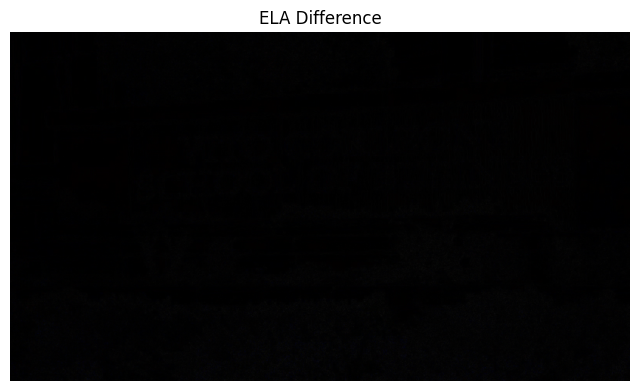

In [27]:
jpeg_quality = 75
resaved_img_path = './ela_resaved_img.jpg'

tp_img.save(resaved_img_path, quality=jpeg_quality)
resaved_img = Image.open(resaved_img_path)

ela_image = ImageChops.difference(tp_img, resaved_img)

plot_image(ela_image, "ELA Difference")

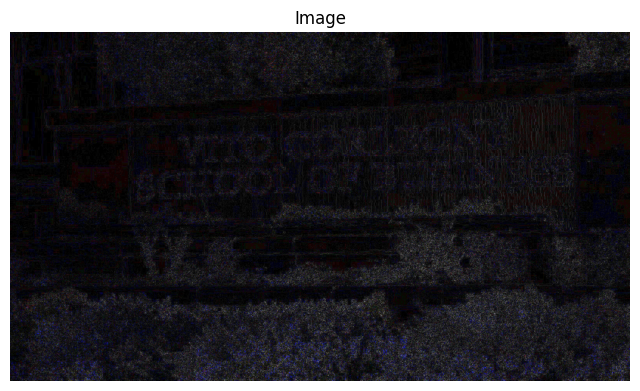

In [28]:
scale_factor = 350.0

extrema = ela_image.getextrema()
max_difference = max([pix[1] for pix in extrema])
max_difference = max_difference if max_difference > 0 else 1
scale = scale_factor / max_difference
ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

plot_image(ela_image)